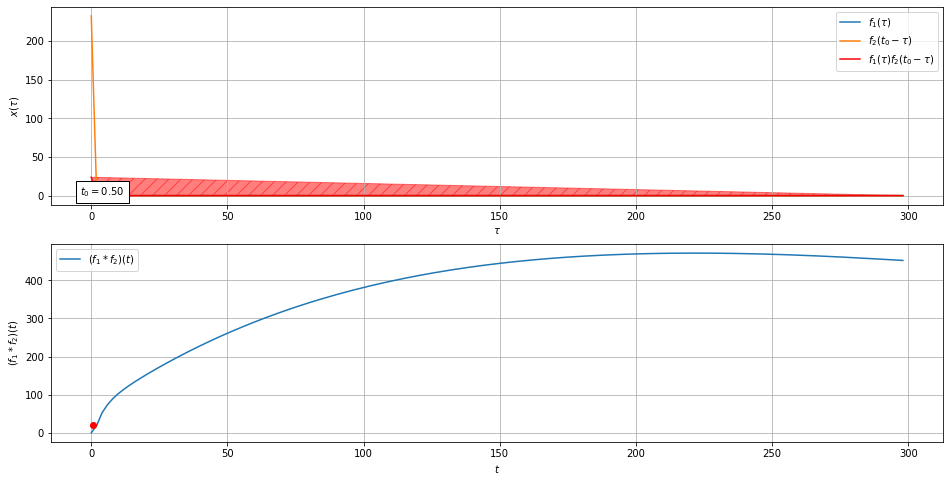

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.integrate

from matplotlib import animation
from IPython.display import HTML, display
from ipywidgets import interact

%matplotlib inline
import matplotlib; matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['animation.writer'] = 'avconv'

def showSin(f):
    plt.rcParams['figure.figsize'] = (20,8)
    t = np.arange(-1, 1, 1/1000)
    plt.gcf().clear()
    k1 = 0.102
    k2 = 0.130
    k3 = 0.062
    k4 = 0.0068
    alpha1 = 0.5*((k1+k2+k3) - math.sqrt(((k1+k2+k3)**2)-4*k4*k2))
    alpha2 = 0.5*((k1+k2+k3) + math.sqrt(((k1+k2+k3)**2)-4*k4*k2))              
    f1 =((k1)/(alpha2-alpha1))*(((k4+k3-alpha1)*np.exp(-alpha1*t))+((alpha2-k3-k4)*np.exp(-alpha2*t)))
    f2 =(0+ np.exp( 5.4511069 - 0.0058556 *t))
    plt.plot(t, np.sin(2*np.pi*f*t*t))
    plt.plot(t, np.cos(2*np.pi*f/(t**2+1)))
    plt.text(0, 0.5, 'f=%.1f' % f, bbox=dict(facecolor='white'))
    plt.grid(True)
    fig = plt.figure(figsize=(16,8))
    anim = animation.FuncAnimation(fig, showSin, frames=np.linspace(0, 50, 500), interval=80)
    HTML(anim.to_html5_video())
def showConvolution(f1, f2, t0):
    # Calculate the overall convolution result using Simpson integration
    convolution = np.zeros(len(t))
    for n, t_ in enumerate(t):
        prod = lambda tau: f1(tau) * f2(t_-tau)
        convolution[n] = scipy.integrate.simps(prod(t), t)

    # Create the shifted and flipped function
    f_shift = lambda t: f2(t0-t)
    prod = lambda tau: f1(tau) * f2(t0-tau)

    # Plot the curves
    plt.gcf().clear() # il

    plt.subplot(211)
    plt.gca().set_ymargin(0.05) # il
    plt.plot(t, f1(t), label=r'$f_1(\tau)$')
    plt.plot(t, f_shift(t), label=r'$f_2(t_0-\tau)$')
    plt.fill(t, prod(t), color='r', alpha=0.5, edgecolor='black', hatch='//') # il
    plt.plot(t, prod(t), 'r-', label=r'$f_1(\tau)f_2(t_0-\tau)$')
    plt.grid(True); plt.xlabel(r'$\tau$'); plt.ylabel(r'$x(\tau)$') # il
    plt.legend(fontsize=10) # il
    plt.text(-4, 0.6, '$t_0=%.2f$' % t0, bbox=dict(fc='white')) # il

    # plot the convolution curve
    plt.subplot(212)
    plt.gca().set_ymargin(0.05) # il
    plt.plot(t, convolution, label='$(f_1*f_2)(t)$')

    # recalculate the value of the convolution integral at the current time-shift t0
    current_value = scipy.integrate.simps(prod(t), t)
    plt.plot(t0, current_value, 'ro')  # plot the point
    plt.grid(True); plt.xlabel('$t$'); plt.ylabel('$(f_1*f_2)(t)$') # il
    plt.legend(fontsize=10) # il
    plt.show() # il

Fs = 0.5  # our sampling frequency for the plotting
T = 300    # the time range we are interested in
t = np.arange(0, T, 1/Fs)  # the time samples
cp = pd.read_csv('data.csv')
cp = list(cp['Concentration'][0:200])
df = cp[0:22]
cp1 = [0.0, 84.9, 230.0, 233.0, 220.0, 236.0, 245.0, 230.0, 227.8, 261.9, 311.7, 321.0, 316.6, 220.7, 231.7, 199.4, 211.1, 190.8, 155.2, 140.1, 144.2]
k1 = 0.102
k2 = 0.130
k3 = 0.062
k4 = 0.0068
alpha1 = 0.5*((k1+k2+k3) - math.sqrt(((k1+k2+k3)**2)-4*k4*k2))
alpha2 = 0.5*((k1+k2+k3) + math.sqrt(((k1+k2+k3)**2)-4*k4*k2))              
f1 = lambda t: ((k1)/(alpha2-alpha1))*(((k4+k3-alpha1)*np.exp(-alpha1*t))+((alpha2-k3-k4)*np.exp(-alpha2*t)))
f2 = lambda t: (t>0) * (0+ np.exp( 5.4511069 - 0.0058556 *t))
plt.rcParams['figure.figsize'] = (16,8)
showConvolution(f1, f2, 0.5)
plt.rcParams['figure.figsize'] = (16,8)

In [143]:
plt.figure()
interact(lambda t0: showConvolution(f1, f2, t0), t0 = (0,200,0.05));

<Figure size 1152x576 with 0 Axes>

interactive(children=(FloatSlider(value=100.0, description='t0', max=200.0, step=0.05), Output()), _dom_classe…